L_train:
 [ 0.93229983  0.86461995  0.79696036  0.72932105  0.66170202  0.59591356
  0.55116333  0.52364215  0.49683961  0.47021503  0.44389885  0.41864581
  0.39738739  0.38357226  0.37597543  0.37112821  0.36773538  0.36523751
  0.36301424  0.36092322  0.3589141   0.35692183  0.35500501  0.35310388
  0.35124533  0.34943636  0.3476324   0.3458834   0.34416415  0.34246358
  0.34076379  0.33906377  0.33737068  0.33569339  0.33403224  0.33244536
  0.33091293  0.32960774  0.32844924  0.32736253  0.32632882  0.32532018
  0.3243365   0.32336254  0.32238887  0.32141693  0.32046642  0.31954519
  0.31862622  0.31774825  0.31688197  0.31607553  0.31530465  0.31456165
  0.31382287  0.31308789  0.31236796  0.31172074  0.31111471  0.31053623
  0.30997461  0.30946915  0.30907747  0.3087308   0.30840539  0.30808088
  0.30775706  0.30743495  0.30713213  0.30685897  0.30658388  0.30631636
  0.30608666  0.30586899  0.30567518  0.30550473  0.30535036  0.30520491
  0.30506014  0.30491541  0.30477258  0.3

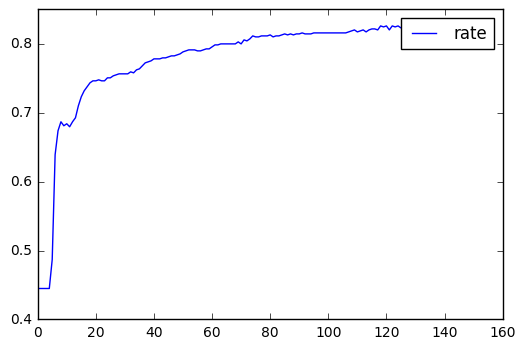

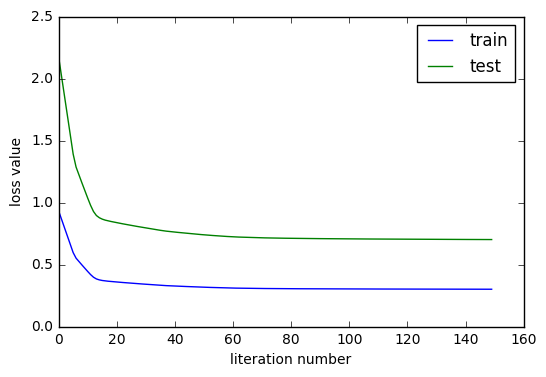

In [23]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack 
import matplotlib.pyplot as plt
%matplotlib inline

def data_loader(train_file):
    X,Y = load_svmlight_file(train_file)
    #housing_scale中有690个数据
    #one = np.ones(690).reshape(690,1)#one是690行1列的矩阵
    #X = hstack( [X, csr_matrix(one)] ).todense()
    #Y = np.array(Y).reshape(690,1)
    X = X.toarray()
    X = np.c_[np.ones((X.shape[0], 1)),X]
    return X, Y

def train_test(X, Y, theta):
    #Y_prediction = X.dot(theta)
    a = np.sum(theta * X, axis = 1)
    b = Y * a
    c = 0
    for i in range(X.shape[0]):
        c = c + max(0, 1 - b[i])
    loss = np.linalg.norm(theta)**2 / 2 + c
    return loss

if __name__ =="__main__":
    X,Y = data_loader("australian_scale")
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#划分数据集
    theta = np.zeros((1,X_train.shape[1])) 
    L_train = np.zeros((150))
    L_validation = np.zeros((150))
    prediction_rate = np.zeros((150))
    learning_rate = 0.000150
    threshold = -1
    for t in range(150):
        #Y_prediction = X.dot(theta) 
        G = theta
        e = np.sum(theta * X_train, axis = 1)
        f = 1 - Y_train * e
        for j in range(0, 482):
            if f[j] >= 0:
                G = G - X_train[j] * Y_train[j]
            else:
                G = G 
        
        theta -= learning_rate * G
        
        pre = np.sum(theta * X, axis = 1)
    
        count = 0
        for j in range(690):
            if pre[j] > threshold:
                pre[j] = 1
            elif pre[j] < threshold:
                pre[j] = -1
                
            if pre[j] == Y[j]:
                count += 1
            
        prediction_rate[t] = count / 690
        L_train[t]=train_test(X_train, Y_train, theta)/(690*0.7)
        L_validation[t]=train_test(X_train, Y_train, theta)/(690*0.3)
    
    print('L_train:\n',L_train)
    print('L_validation:\n',L_validation)
    plt.plot(prediction_rate,label='rate')
    plt.legend()
    plt.show()
    plt.plot(L_train,label='train')
    plt.plot(L_validation,label='test')
    plt.ylabel('loss value')
    plt.xlabel('literation number')
    plt.legend() 
    